<a href="https://colab.research.google.com/github/wathsala-vishwajith/ML-Playground/blob/main/SCS3201_Assignment_2_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Random Forest Assignment 
---


Import libaries

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
import pandas
print(pandas.__version__)

1.3.5


Import the dataset

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

--2022-09-19 12:29:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data’

car.data            100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2022-09-19 12:29:19 (385 KB/s) - ‘car.data’ saved [51867/51867]

--2022-09-19 12:29:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3097 (3.0K) [application/x-httpd-php]
Saving to: ‘car.names’

car.names           100%[===================>]   3.02K  --.-KB/s    in 0s      

2022-09-19 12:29:20 (70.2 M

In [3]:
!cat car.names
!head car.data

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

Import the dataset

In [43]:
cols = ["buying", "maint","doors","persons","lug_boot","safety","class" ]
df  = pd.read_csv('/content/car.data',names=cols)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Preprocessing 
---
Convert categorical data.

In [49]:
df.buying = pd.Categorical(df.buying)
df.buying = df.buying.cat.codes
df.maint = pd.Categorical(df.maint)
df.maint = df.maint.cat.codes
df.lug_boot = pd.Categorical(df.lug_boot)
df.lug_boot = df.lug_boot.cat.codes
df.safety = pd.Categorical(df.safety)
df.safety = df.safety.cat.codes

#edit the doors values to numerical
df["doors"]  = np.where(df["doors"] == "more", 5, df["doors"] ) 
df["doors"]  = np.where(df["doors"] == "5more", 6, df["doors"] ) 
df["doors"] = pd.to_numeric(df["doors"])
df["persons"]  = np.where(df["persons"] == "more", 5, df["persons"] ) 
df["persons"] = pd.to_numeric(df["persons"])

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
buying,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
maint,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
doors,1728.0,3.750000,1.479448,2.0,2.75,3.5,4.50,6.0
persons,1728.0,3.666667,1.247580,2.0,2.00,4.0,5.00,5.0
lug_boot,1728.0,1.000000,0.816733,0.0,0.00,1.0,2.00,2.0
safety,1728.0,1.000000,0.816733,0.0,0.00,1.0,2.00,2.0


In [51]:
df.head

<bound method NDFrame.head of       buying  maint  doors  persons  lug_boot  safety  class
0          3      3      2        2         2       1  unacc
1          3      3      2        2         2       2  unacc
2          3      3      2        2         2       0  unacc
3          3      3      2        2         1       1  unacc
4          3      3      2        2         1       2  unacc
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      6        5         1       2   good
1724       1      1      6        5         1       0  vgood
1725       1      1      6        5         0       1  unacc
1726       1      1      6        5         0       2   good
1727       1      1      6        5         0       0  vgood

[1728 rows x 7 columns]>

Splitting the dataset

In [52]:
#for splitting data into train and test set
from sklearn.model_selection import train_test_split

x=df.drop(["class"],axis=1).values

y=df["class"].values
print(y)
print(x)

['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']
[[3 3 2 2 2 1]
 [3 3 2 2 2 2]
 [3 3 2 2 2 0]
 ...
 [1 1 6 5 0 1]
 [1 1 6 5 0 2]
 [1 1 6 5 0 0]]


In [53]:
#splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Finding important features in the dataset

In [54]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)


RandomForestClassifier()

Important features

In [55]:
feature_imp = pd.Series(clf.feature_importances_,index=["buying", "maint","doors","persons","lug_boot","safety"]).sort_values(ascending=False)
feature_imp


safety      0.282242
persons     0.214967
buying      0.189261
maint       0.159607
lug_boot    0.087216
doors       0.066707
dtype: float64

Visualize the importance

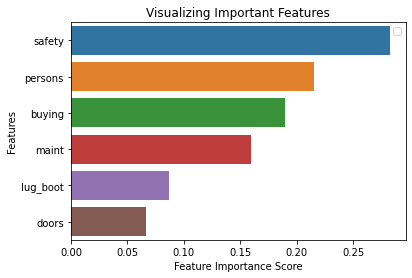

In [56]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


#### Preditions
---



In [57]:
y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9739884393063584
